# NUMERICAL DIFFERENTIATION

  - SOLVING TAYLOR SERIES
  - BACKWARD DIFFERENCE
  - FORWARD DIFFERENCE
  - CENTERED DIFFERENCE

In [2]:
import numpy as np
import math
from math import sin, pi
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")


In [27]:
exp = 0
x = 2
for i in range(10):
    exp = exp + (x**i)/np.math.factorial(i)
print(f"The true e^2 is: \n{np.exp(2)}")

The true e^2 is: 
7.38905609893065


In [28]:
def fact(n): 
    if (n == 0 or n == 1):
        return 1
    return n*fact(n-1)   # 4 * 3 * 2 * 1 = 4! 

tol = 1e-5
max_iter = 100

def sine(x):
    x = x % pi
    prev_sum = 0.0
    current_sum = x
    n = 1
    
    while ((abs(current_sum - prev_sum) >= tol)):
        prev_sum = current_sum
        current_sum += (-1)**n * (x** (2*n + 1))/fact(2*n + 1)
        n += 1

        if (n > max_iter):
            break

    return current_sum


print("sine(2.4) = ", sine(3.142*200))
print("sin(2.4) = ", sin(3.142*200))


sine(2.4) =  0.08137919003331151
sin(2.4) =  0.08137919002856119


In [29]:
''' Backward difference '''
backWard  = lambda f,x,h : (f(x) - f(x-h))/h

''' Foward difference '''
forWard   = lambda f,x,h : (f(x+h) - f(x))/h

''' Centered difference '''
centered  = lambda f,x,h : (f(x+h) - f(x-h))/(2*h)

class Differential():
    def __init__(self,x,f,h,y=None):
        self.x = x
        self.f = f
        self.h = h
        self.y = y
        
    def forward_difference(self):
        diff = (f(self.x+self.h) - f(self.x))/self.h
        return diff
        
    def backward_difference(self):
        diff = (f(self.x) - f(self.x-self.h))/self.h
        return diff
    
    def centered_difference(self):
        diff = (f(self.x+self.h) - f(self.x-self.h))/(2*self.h)
        return diff
    
        
def f(x):
    return (math.cos(x))

        
c = Differential(0,f,0.01)
c.forward_difference()
c.backward_difference()
c.centered_difference()



0.0

# ROOT FINDING METHODS
 - BRACKETING METHODS
  - BISECTION METHOD
  - FALSE POSITION METHOD
  - MODIFIED REGILA FALSI METHOD
 - OPEN METHODS
  - FIXED POINT ITERATION
  - NEWTON RALHPSON METHOD

### BRACKETING METHODS

#### BISECTION METHOD

In [30]:
def bisection(func, x_lower, x_upper, tol, iter_max = 200):
    # In this method the estimate of the root is obtained 
    # from bisecting the interval
    
    iter = 0
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    while(ea > tol or iter < iter_max): 

        x_root = (x_lower + x_upper)/2.0
        # 1st interval x_lower to x_root, (x_lower, x_root)
        # 2nd interval x_root to x_upper, (x_root, x_upper)

        # A root is in an interval (a, b) if and only if 
        # f(a)f(b)<=0

        f_x_root = func(x_root)

        if (f_x_lower * f_x_root <= 0): 
            x_upper = x_root
            f_x_upper = f_x_root
            
        else:
            x_lower = x_root
            f_x_lower = f_x_root
        
        ea =  abs((x_upper - x_lower)/( x_upper + x_lower)) * 100 # Relative error
        iter += 1
        # ea = abs((x_root_new - x_root_old)/x_root_new) * 100
    
    return (x_lower + x_upper)/2


print("The root of the sine function between 0.2, 5 =", bisection(sin, 0.2, 5, 0.01))


The root of the sine function between 0.2, 5 = 3.141592653589793


#### FALSE POSITION OR REGULA FALSI METHOD

In [31]:
def test_func1(x):            #used to derive f(x) from x
    return x**10 - 1
def test_func11(y):           #used to derive x from f(x)
    #y = x**10 - 1
    x = (y+1)**0.1
    return x

def test_func2(c):
    return (9.8*68.1/c)*(1 - exp(-10*c/68))-40
def test_func21(y):
    x = ((y+40)/9.8*68.1)

    
print("------------->>>>>>>>>>>>>REGULA FALSI METHOD<<<<<<<<<<<<<-------------------\n")
def false_position(func, x_lower, x_upper, tol, iter_max = 200):
    iter = 0
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    x_root = (x_lower + x_upper)/2 

    #
    while(ea > tol and iter < iter_max): 
        x_root_old = x_root
        x_root = x_upper - (func(x_upper)*(x_lower - x_upper))/(func(x_lower) - func(x_upper))

        f_x_root = func(x_root)

        if (f_x_lower * f_x_root <= 0): 
            x_upper = x_root
            f_x_upper = f_x_root
            
        else:
            x_lower = x_root
            f_x_lower = f_x_root
        
        ea = abs((x_root - x_root_old)/x_root)*100 #Relative error
        iter += 1
    
    return (x_root, iter)


sol = false_position(test_func1, 0, 1.3, 0.01)

print("The root of the function is =", sol[0], sol[1],"\n")


------------->>>>>>>>>>>>>REGULA FALSI METHOD<<<<<<<<<<<<<-------------------

The root of the function is = 0.9996886513360608 39 



#### MODIFIED REGULA FALSI METHOD

------------->>>>>>>>>>>>> MODIFIED REGULA FALSI METHOD<<<<<<<<<<<<<-------------------

The root of the function is = 0.9999186317806551 20


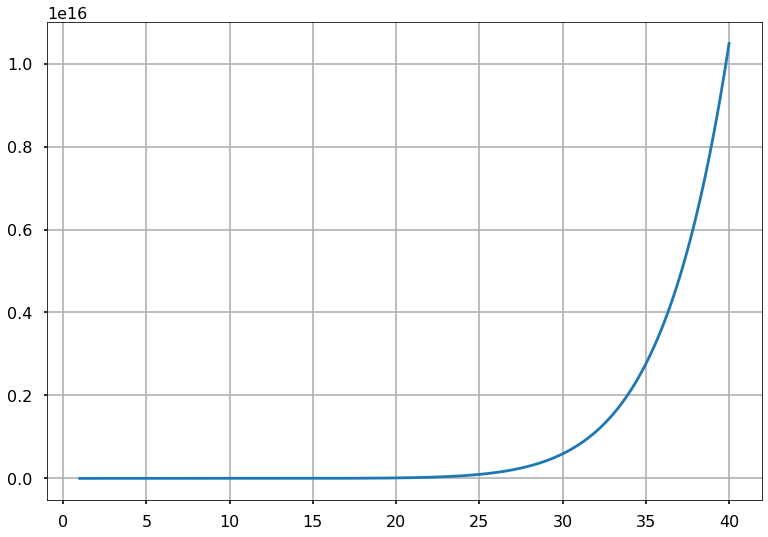

In [32]:
print("------------->>>>>>>>>>>>> MODIFIED REGULA FALSI METHOD<<<<<<<<<<<<<-------------------\n")   
    
def modified_false_position(func,func1, x_lower, x_upper, tol, iter_max = 200):
    iter = 1
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    x_root = (x_lower + x_upper)/2 

    xupper_new = x_upper
    while(ea > tol and iter < iter_max):
        if iter%3 == 0:
            x_root_old = x_root
            xupper_new = func1(func(xupper_new)/2)
            #print(xupper_new)
            x_root = xupper_new - (func(xupper_new)*(x_lower - xupper_new))/(func(x_lower) - func(xupper_new))

            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
            
        else:
            x_root_old = x_root
            x_root = x_upper - (func(x_upper)*(x_lower - x_upper))/(func(x_lower) - func(x_upper))

            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
        
        ea = abs((x_root - x_root_old)/x_root)*100 #Relative error
        iter += 1
    
    return (x_root, iter)


sol = modified_false_position(test_func1, test_func11, 0, 1.3, 0.01)

print("The root of the function is =", sol[0], sol[1])
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(1,40,200)
y_values = [test_func1(x_value) for x_value in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

### OPEN METHODS

#### FIXED POINT ITERATION

In [12]:
def fixed_point_iteration(f,x,tol, max_iter):
    x_new = f(x)
    _iter = 0
    while _iter < max_iter:
        x_old = x_new
        x_new = f(x_old)
        if abs(x_old - x_new) <= tol:
            return x_new
    return x_new
def func(x):
    return np.log(x**2 + 5)
def func1(x):
    return x**2 - np.exp(x) + 5

def sines(x):
    return np.sin(x)

#fixed_point_iteration(sine, 3, 0.001, 200)
fixed_point_iteration(func, 2, 0.001, 200)

#newton_ralphson(f1, 0.5825, 0.0001, 200)
#fixed_point_iteration(f1, 0.5825,0.0001,200)

2.355788348330863

#### NEWTON RALPHSON METHOD

In [16]:
centered  = lambda f,x,h : (f(x+h) - f(x-h))/(2*h)
def newton(f,x,tol, max_iter):
    _iter = 0
    x_new = x
    while _iter < max_iter:
        x_old = x_new
        numerator = f(x_old)
        denominator = centered(f,x_old,0.0000000000001)
        x_new = x_old - numerator/denominator
        _iter +=1
        if abs(x_old - x_new) <= tol:
            return x_new
    return x_new
#newton(func1, 2, 0.001, 200)


# Provide solution here

func  =  lambda x : (x**5) - (16.05* (x**4)) + (88.75*(x**3)) - (192.0375 * (x**2)) + (116.35 * x) + 31.6875

#DERIVE

def firstDiff(x , dx = 0.001):
    #Evaluate Diffferential using central difference method
    num   = func(x+dx) - func(x-dx) 
    denum = 2* dx
    return num/denum
centered  = lambda f,x,h : (f(x+h) - f(x-h))/(2*h)
                                                # Returns the root of the equation 

print(newton(func1, 2, 0.001, 200))


2.356353392127161


In [55]:
x= centered(sines,np.pi,0.000000001)
x

-1.000000082740371

# SYSTEMS OF LINEAR EQUATION

### GAUSSIAN ELIMINATION METHOD

In [75]:
import numpy as np

# Naive Gaussian Elimination algorithm
''' 
// Transform the coefficient matrix to the upper triangular form
// Backward substitution to get the solution of the system
x = b * inv(A)
---------------------------------------------------
    6 x1 - 4 x2 + x3 = -14 ...(1)        R1
    -4 x1 + 6 x2 - 4 x3 = 36 ... (2)     R2 
    x1 - 4 x2 - 6 x3 = 6 ...(3)          R3
---------------------------------------------------
 -4 - 6 * factor = 0
 factor = -4/6
 R2 <-- R2 - R1*(-4/6) 
 0 x1 + 10/3 x2 - 10/3 x3 = 80/3
 R3 <-- R3 - R1*(1/6)
 0 x1 - 10/3 x2 + 35/6 x3 = 25/3

 R3 <-- R3 - R2*(-1)
 0 x1 + 0 x2 + 5/2 x3 = 35
 -------------------------------------------
    6 x1 - 4 x2 + x3 = -14 ...(1)        R1
    0 x1 + 10/3 x2 - 10/3 x3 = 80/3      R2
    0 x1 + 0 x2 + 5/2 x3 = 35            R3
--------------------------------------------


//Simple elementary row operations to the system
    c11 x1 + c12 x2 + c13 x3 = d1    /// Upper triangular matrix
    0      + c22 x2 + c23 x3 = d2
    0      +     0  + c33 x3 = d3


------------------------------------------------
Backward substitution
    Ax = b
    A = [[6, -4, 1],
         [-4, 6, -4],
         [1, -4, -6]]

    b = [-14, 36, 6]

    x = [x1, x2, x3]
    -------------------------------------------------
'''

def gaussElimin(a,b):

    # 3x3 
    # n = 3
    # 0, 1
    n = len(b)
    # Elimination Phase
    for k in range(0,n-1): # Column
        print(k)
        for i in range(k+1,n): # Row 1, 2
            # if a[i,k] != 0.0:
            fact = a[i][k]/a[k][k]

            for j in range(k, n):
                a[i][j] = a[i][j] - fact*a[k][j]
            
            b[i] = b[i] - fact*b[k]

            # lam = a[i,k]/a[k,k] # lam = a[1,0]/a[0, 0] 
            # a[i,k:n] = a[i,k:n] - lam*a[k,k:n] # columns
            # b[i] = b[i] - lam*b[k] # columns

    print(b)
    
    # Back substitution
    for k in range(n-1, -1, -1): # range(2, -1, -1)
        # x[n-1] = x[2] = b[n-1]/a[n-1][n-1] =  b[2]/a[2][2]
        # x[n-2] = x[1] = (b[1] - a[1][2]*x2)/a[1][1]
        # x[n-3] = x[0] = (b[0] - a[0][1]*x1 - a[0][2]*x2)/a[0][0]

        # x_k = b_k - (sum from k + 1 to n --> a_kj*xj where j is the loop variable)

        sum = 0
        for j in range(k+1, n):
            sum += a[k][j] * b[j]

        b[k] = (b[k] - sum)/a[k][k]




    # for k in range(n-1,-1,-1):
    #     b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b


a = [[6., -4., 1. ],
            [-4., 6., -4.],
            [1., -4., 6.]]

b = [-14., 36., 6.]

print(gaussElimin(a, b))

0
1
[-14.0, 26.666666666666668, 35.0]
[10.000000000000002, 22.000000000000004, 14.000000000000002]


# SOLVING DIFFERENTIAL EQUATIONS
- EULER METHOD
- EULER CAUCHY
- RUNGE KUTTA METHOD

### EULER METHOD

In [80]:
import math
import matplotlib.pyplot as plt
def Euler_Method(x,x2,y,h,func):
    yN = y + h * func(x,y)
    xlist = []
    ynumerical = []
    ya = 3*x + math.exp(1-x) 
    yana = []
    while x <= x2 :
        ynumerical.append(y)
        y_prime = func(x,y)
        yN = y + h * y_prime
        ya = 3*x + math.exp(1-x)
        yana.append(ya)
        xlist.append(x)
        #ynumerical.append(yN)
        x = x + h
        y = yN
    return xlist, ynumerical, yana
def func11(x,y):
    return (3*(1+x)-y)
a = Euler_Method(1,2,4, 0.2, func11)

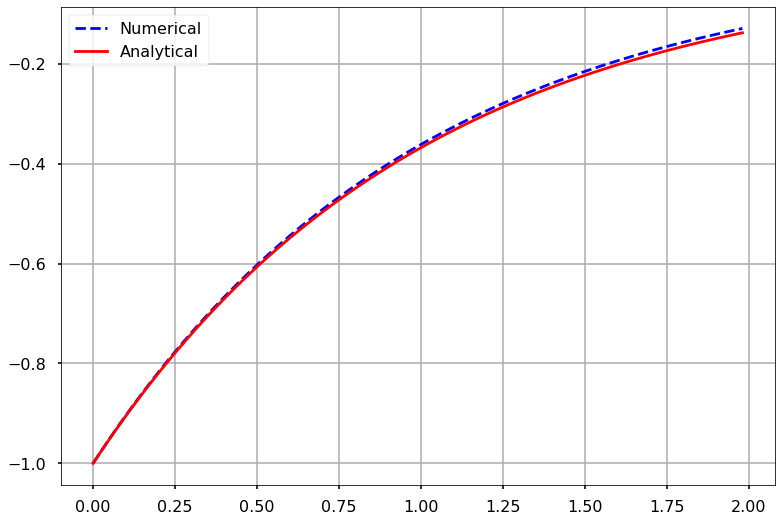

No handles with labels found to put in legend.


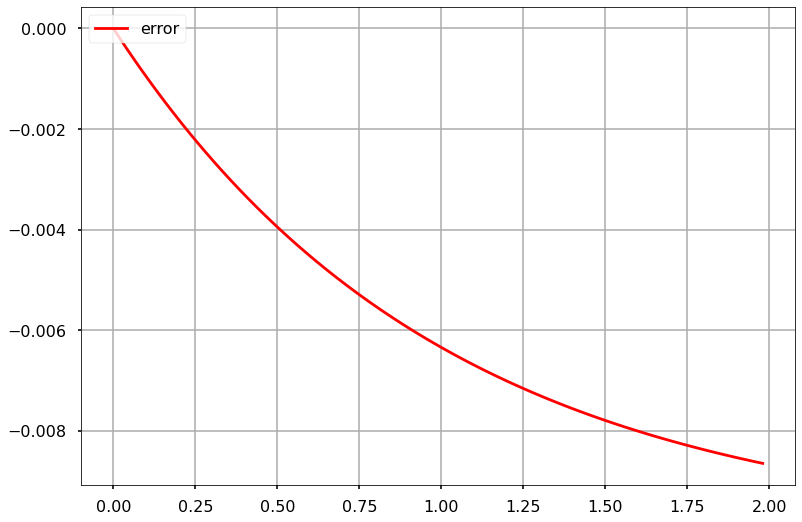

In [7]:
import math
import matplotlib.pyplot as plt
def Euler_Method(x,x2,y,h,func):
    yN = y + h * func(x,y)
    xlist = []
    ynumerical = []
    ya = -1 * math.exp(-x) 
    yana = []
    while x <= x2 :
        ynumerical.append(y)
        y_prime = func(x,y)
        yN = y + h * y_prime
        ya = -1 * math.exp(-x) 
        yana.append(ya)
        xlist.append(x)
        #ynumerical.append(yN)
        x = x + h
        y = yN
    return xlist, ynumerical, yana
def func11(x,y):
    return np.exp(-x)
a = Euler_Method(0,2,-1, 0.02, func11)
x_values = a[0]
#print(">>>>>>>>>>>>>>> x_values <<<<<<<<<<<<<<<< \n")
#print(x_values)
y_num_values = a[1]
#print(">>>>>>>>>>>>>>> y_num_values <<<<<<<<<<<<<<<< \n")
#print(y_num_values)
y_anal_values = a[2]
#print(">>>>>>>>>>>>>>> y_anal_values <<<<<<<<<<<<<<<< \n")
#print(y_anal_values)
error = [analy - numeric for analy, numeric in zip(y_anal_values, y_num_values)]
#print(">>>>>>>>>>>>>>> error <<<<<<<<<<<<<<<< \n")
#print(error)
plt.plot(x_values, y_num_values, "--b", label = "Numerical")
plt.plot(x_values, y_anal_values, "-r", label = "Analytical")
plt.legend(loc = "upper left")
#plt.plot(x_values, error)
plt.grid()
plt.show()
plt.legend(loc = "upper left")
plt.plot(x_values, error, "-r", label = "error")
plt.legend(loc = "upper left")
plt.grid()
plt.show()

### EULER CAUCHY METHOD

In [79]:
def Euler_Cuachy_Method(x,x2,y,h,func):
    y_prime = func(x,y)
    #y_aux = y + h * func(x,y)
    #yN = y + 0.5 * h * (y_prime + (y_aux - x))
    x_list = []
    y_numerical = []
    yA = (x + 1) + 1 * math.exp(x)
    y_analtical = []
    #i = 1
    while x < (x2+h) :
        y_numerical.append(y)
        x_list.append(x)
        y_analtical.append(yA)
        x = x + h
        y_aux = y + h * y_prime
        yN = y + 0.5 * h * (y_prime + func(x,y_aux))
        y = yN
        yA = (x + 1) + 1 * math.exp(x) 
        
        y_prime = func(x,yN)
    return x_list, y_numerical, y_analtical

def func11(x,y):
    return (y-x)
def cosine(x,y):
    return(math.cos(x))

a = Euler_Cuachy_Method(0,0.5,2, 0.1, func11)    

# NUMERICAL INTEGRATION

- TRIANGULAR METHOD
- TRAPEZOIDAL METHOD
- SIMPSON 1/8 METHHOD
- SIMPSON 3/8 METHOD

### TRAPEZOIDAL METHOD

In [82]:
import numpy as np
def trapezoidal(a,b,f,h=None,n=None):
    try:
        h = (b-a)/n
        print(h, n)
        x_values = np.linspace(a,b,n+1)
    except Exception:
        x_values = np.arange(a,b+h,h)
        print(h)
    sum_ = f(x_values[0]) + f(x_values[-1])
    for i in x_values[1:-1]:
        sum_ += 2*f(i)
    return h/2 * sum_

def func(x):
    return 1/x
trapezoidal(1,2,func,h=0.000001)

1e-06


0.693147680575747

### RECTANGULAR METHOD

In [84]:
def rectangular(a,b,f,h=None,n=None):
    try:
        h = (b-a)/n
        print(h, n)
        x_values = np.linspace(a,b,n+1)
        #print(x_values)
    except Exception:
        x_values = np.arange(a,b+h,h)
        print(h)
    sum_ = 0
    for i in x_values:
        sum_ += f(i)
    return h * sum_
rectangular(1,2,func,h=0.001)    

0.001


0.6938972430599573

### SIMPSON'S 1/3 METHOD

In [85]:
def simpson_1_3(a,b,f,n):
    if n != None and n%2 == 0:
        h = (b-a)/n
        x_values = np.linspace(a,b,n+1)
        sum_ = f(x_values[0]) + f(x_values[-1])
        for i in range(1,n):
            if i%2 == 0:
                sum_ += 2*f(x_values[i])
            else:
                sum_ += 4*f(x_values[i])
        return h/3 * sum_
    elif n != None and n%2 == 1:
        print("n has to be an even number")
    
def func12(x):
    return 1/(np.sqrt(x+1))

simpson_1_3(0,2,func12,6)



1.4642077146395185

### SIMPSON'S 3/8 METHOD

In [86]:
def simpson_3_8(a,b,f,n):
    if n != None and n%3 == 0:
        h = (b-a)/n
        x_values = np.linspace(a,b,n+1)
        sum_ = f(x_values[0]) + f(x_values[-1])
        for i in range(1,n):
            if i%3 == 0:
                sum_ += 2*f(x_values[i])
            else:
                sum_ += 3*f(x_values[i])
        return 3*h/8 * sum_
    else:
        print("n has to be a multiple of 3")
    
simpson_3_8(0,2,func12,6)    

1.4643135462314754

# OPTIMIZATION METHODS
- UNIVARIATE METHODS
 - GOLDEN SEARCH SECTION
 - PARABOLIC INTEROLATION
 - NEWTON METHOD
- MULTIVARIATE METHODS
 - STEEPEST DESCENT METHOD
 - NEWTON METHOD

### UNIVARIATE METHODS

#### NEWTON INTERPOLATION

In [91]:
import sys
from math import sin, pi
def newton_interpolation(f, x,max_iter, tol):
    calc_tol = 10000000
    x_opt = x
    _iter = 1
    h = 0.001
    #f0 = f(x0)
    backWard  = lambda f,x,h : (f(x) - f(x-h))/h
    forWard   = lambda f,x,h : (f(x+h) - f(x))/h
    centered  = lambda f,x,h : (f(x+h) - f(x-h))/(2*h)
    sec_order = lambda f,x,h : (forWard(f,x,h)-backWard(f,x,h))/h
    try:
        first_differential = centered(f,x_opt,h)
        second_differential = sec_order(f,x_opt,h)
        x_opt = x_opt - (first_differential/second_differential)
    except ZeroDivisionError:
        return x_opt
    while (calc_tol >= tol and _iter < max_iter):
        first_differential = centered(f,x_opt,h)
        second_differential = sec_order(f,x_opt,h)
        x_old = x_opt
        try:
            x_opt = x_opt - (first_differential/second_differential)
        except ZeroDivisionError:
            return x_opt
        _iter += 1
        calc_tol = abs(x_old-x_opt) # This is not the absolute error
        if _iter == max_iter:
            break
    return x_opt
        
sine = lambda x: -sin(x) 
result = newton_interpolation(sine,0.6*pi,200, 0.00000000001)
print(f"The minimum value of the function is: {result}")

The minimum value of the function is: 1.5707963267949059


#### GOLDEN SEARCH METHOD

The maximum value of the function is: 1.5707963169257235 after 44 iterations
f(x) = 1.0


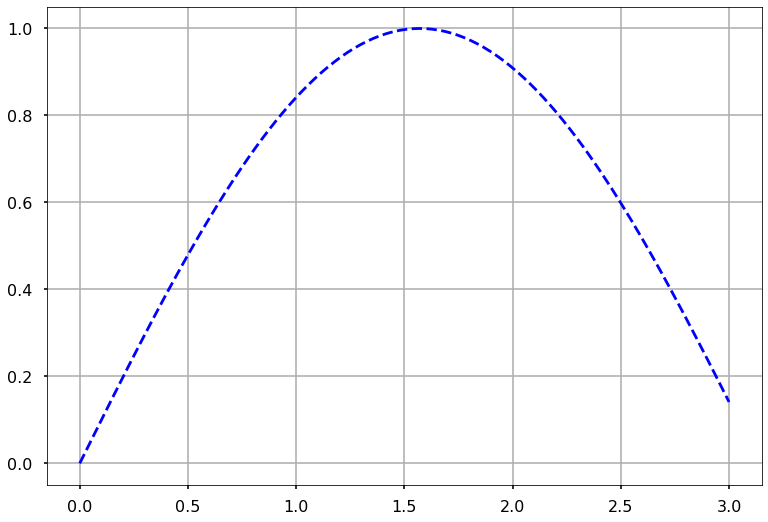

In [87]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import sin, pi
# x_low => lower limit
# x_high => upper limit

def golden_search(f, x_low, x_high, max_iter, es):
    ea = sys.float_info.max
    R = (5**(0.5) - 1)/2.0
    x_l = x_low
    x_u = x_high
    _iter = 1
    d = R*(x_u - x_l)
    x1 = x_l + d
    x2 = x_u - d
    f1 = f(x1)
    f2 = f(x2)
    xopt = x1
    fopt = f1


    # if f1 > f2:
    #     xopt = x1
    #     fopt = f1
    # else: 
    #     xopt = x2
    #     fopt = f2

    # These are the conditions
    # (a, x2, x1, b)
    # Interval (a, b) 
    # If f1 > f2 ==> Shrink the interval from the left; a = x2; x2 = x1 and b = b: (a, x2, b)
    # else b = x1, x1 = x2, a = a

    # d = (b-a)*R

    # (1 - R)

    # (a, b)
    # x1 = a + R(b-a) = a(1 - R) + Rb
    # x2 = b - R(b - a) = b(1 - R) + Ra

    # f1 > f2; a = x2; x2 = x1; b = b
    # length = b - a = b - b(1 - R) - Ra = R(b-a) /// (1-R)(b-a)
    # d = R*length = R*R(b-a) = R^2(b-a)


    # d1 =  R*(x_u - x_l)
    # d2 = d1*R = R^2...
    while (ea > es and _iter < max_iter):
        d = d*R 
        if f1 > f2: # Shrink the interval from the left
            x_l = x2
            x2 = x1
            f2 = f1
            x1 = x_l + d
            f1 = f(x1)
        else:
            x_u = x1
            x1 = x2
            f1 = f2
            x2 = x_u - d
            f2 = f(x2)

        
        # (a, x2, x1, b)
        # (_ , f2, f1, _)

        _iter += 1

        if f1 > f2:
            xopt = x1
            fopt = f1
        else: 
            xopt = x2
            fopt = f2

        # if (xopt == 0): continue

        if (xopt != 0):
            ea = (1 - R) * abs((x_u - x_l) / xopt) * 100

    return (xopt, _iter)
        


        
result = golden_search(sin, 0, pi, 200, 0.0000001)

print(f"The maximum value of the function is: {result[0]} after {result[1]} iterations")
print(f"f(x) = {sin(result[0])}")

x_values = np.linspace(0,3,200)
y_values = [sin(x) for x in x_values]

plt.plot(x_values, y_values, "--b")
plt.grid()
plt.show()



#### PARABOLIC INTERPOLATION

In [ ]:
def parabolic_interpolation(f, x_low, x_intermediate, x_high, max_iter, tol):
    def get_optima_estimate(x0, x1, x2, f0, f1, f2):
        numerator = f0 * (x1**2-x2**2) + f1 * (x2**2-x0**2) + f2 * (x0**2-x1**2)
        denominator = (2 * f0 * (x1 - x2)) + (2 * f1 * (x2 - x0)) + (2 * f2 * (x0 - x1))
        return numerator/denominator
    calc_tol = sys.float_info.max
    x0 = x_low
    x1 = x_intermediate
    x2 = x_high
    _iter = 1
    f0 = f(x0)
    f1 = f(x1)
    f2 = f(x2)
    while (calc_tol >= tol and _iter < max_iter):
        x3 = get_optima_estimate(x0, x1, x2, f0, f1, f2)
        f3 = f(x3)
        if x3 > x1:
            if f3 > f1:
                # Shrink the interval from the upper limit
                x2 = x3
                f2 = f3
            else:
                # Shrink the interval from the lower limit
                x0 = x1
                x1 = x3
                f0 = f1
                f1 = f3
        else:
            if f3 > f1:
                # Shrink interval from the lower limit
                x0 = x3
                f0 = f3
            else:
                # shrink the interval from the upper limit
                x2 = x1
                f2 = f1
                x1 = x3
                f1 = f3
        _iter += 1
        calc_tol = abs(x2-x0) # This is not the absolute error
    return(x3, _iter)
        
sine = lambda x: -sin(x) 
result = parabolic_interpolation(sine, 0, 0.6*pi, pi, 200, 0.000001)
print(f"The minimum value of the function is: {result[0]} after {result[1]} iterations")

### MULTIVARIATE OPTIMIZATION

#### STEEPEST DESCENT

In [92]:
import sympy as sym
#from sympy import *
import scipy.optimize

#𝑥^2+2𝑦^2−2𝑥𝑦−2𝑥 

# Line search function
def f_of_h(h):
    return f(x-gx*h,y-gy*h)
def f(x,y):
    return x**2 + 2*y**2 - 2*x*y - 2*x


def grad(x,y):
    fprime_x = 2*x - 2* y - 2
    fprime_y = 4*y - 2*x
    return (fprime_x, fprime_y)

def grad_num(f, x, y, offset = 0.0001):
    fprime_x = (f(x + offset, y) - f(x - offset, y))/2*offset
    fprime_y = (f(x, y + offset) - f(x, y - offset))/2*offset
    return (fprime_x, fprime_y)


def get_optimal(x,y,f,f_grad, max_iter, tol=0.000001):
    (gx, gy) = grad(x, y)

    for i in range(max_iter):
        # f(h) = f(x-gx*h, y-gy*h)
        def f_of_h(h):
            return f(x-gx*h,y-gy*h)
        h_opt = newton_interpolation(f_of_h, 0, 200, tol)

        # print(f"x = {x}, y={y}, f(x,y)={f(x,y)}")

        sx = gx*h_opt
        sy = gy*h_opt
        x = x - sx
        y = y - sy

        (gx, gy) = grad(x, y)

        if (sx**2 + sy**2 <= tol):
            return (x, y)

    return (x, y)

result = get_optimal(-1, 1, f, grad, 200, tol=1e-10)
print(result)



    



(1.9999951391843442, 0.9999967394265915)
